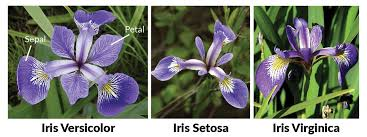

Dataset Information
    Each instance is a plant

    This is one of the earliest datasets used in the literature on classification methods and widely used in statistics and machine learning.  The data set contains 3 classes of 50 instances each, where each class refers to a type of iris plant.  One class is linearly separable from the other 2; the latter are not linearly separable from each other.

Predicted attribute: class of iris plant.

This data differs from the data presented in Fishers article (identified by Steve Chadwick,  spchadwick@espeedaz.net ).  The 35th sample should be: 4.9,3.1,1.5,0.2,"Iris-setosa" where the error is in the fourth feature. The 38th sample: 4.9,3.6,1.4,0.1,"Iris-setosa" where the errors are in the second and third features.  

Has Missing Values?
No

ref:  https://archive.ics.uci.edu/dataset/53/iris

## STEP 1 Load and Confirm Data

In [43]:
# But first, install the required packages
# If you are using Jupyter Notebook, you can use the following commands to install the packages
%pip install matplotlib
%pip install seaborn

Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.


In [44]:
#importing all the libraries
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import rcParams
import pandas as pd
import seaborn as sns
from sklearn.datasets import load_iris

# inline plotting for Jupyter notebooks.  Sometimes does not work well...
%matplotlib inline

In [45]:
# Load the iris dataset from sklearn
# and convert it to a pandas DataFrame
# The iris dataset is a classic dataset for classification tasks.

iris = load_iris()
df_iris = pd.DataFrame(data=iris.data, columns=iris.feature_names)
df_iris['species'] = iris.target

In [46]:
# See the first few rows of the DataFrame
df_iris.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


### STEP 2 Check for missing *values*

In [47]:
# Check for missing data in each column
missing_data = df_iris.isnull().sum()

# Display the missing data count
print(missing_data)

sepal length (cm)    0
sepal width (cm)     0
petal length (cm)    0
petal width (cm)     0
species              0
dtype: int64


In [48]:
# Check if there are any missing values in the DataFrame
df_iris.isnull().any()

sepal length (cm)    False
sepal width (cm)     False
petal length (cm)    False
petal width (cm)     False
species              False
dtype: bool

### STEP 3 Check for catagorical values

In [49]:
# Check the data types of each column
# This is important for understanding how to handle the data
# and for ensuring that the data types are appropriate for analysis.
print(df_iris.dtypes)

sepal length (cm)    float64
sepal width (cm)     float64
petal length (cm)    float64
petal width (cm)     float64
species                int64
dtype: object


### STEP 4 Address missing values

In [50]:
# # Drop rows with missing data
# df_iris_cleaned = df_iris.dropna()

# # Display the cleaned DataFrame
# print(df_iris_cleaned)

# # Drop columns with any NaN values
# df_iris_cleaned = df_iris.dropna(axis=1)

# # Display the cleaned DataFrame
# print(df_iris_cleaned)

### STEP 5 Understand distribution and correlation

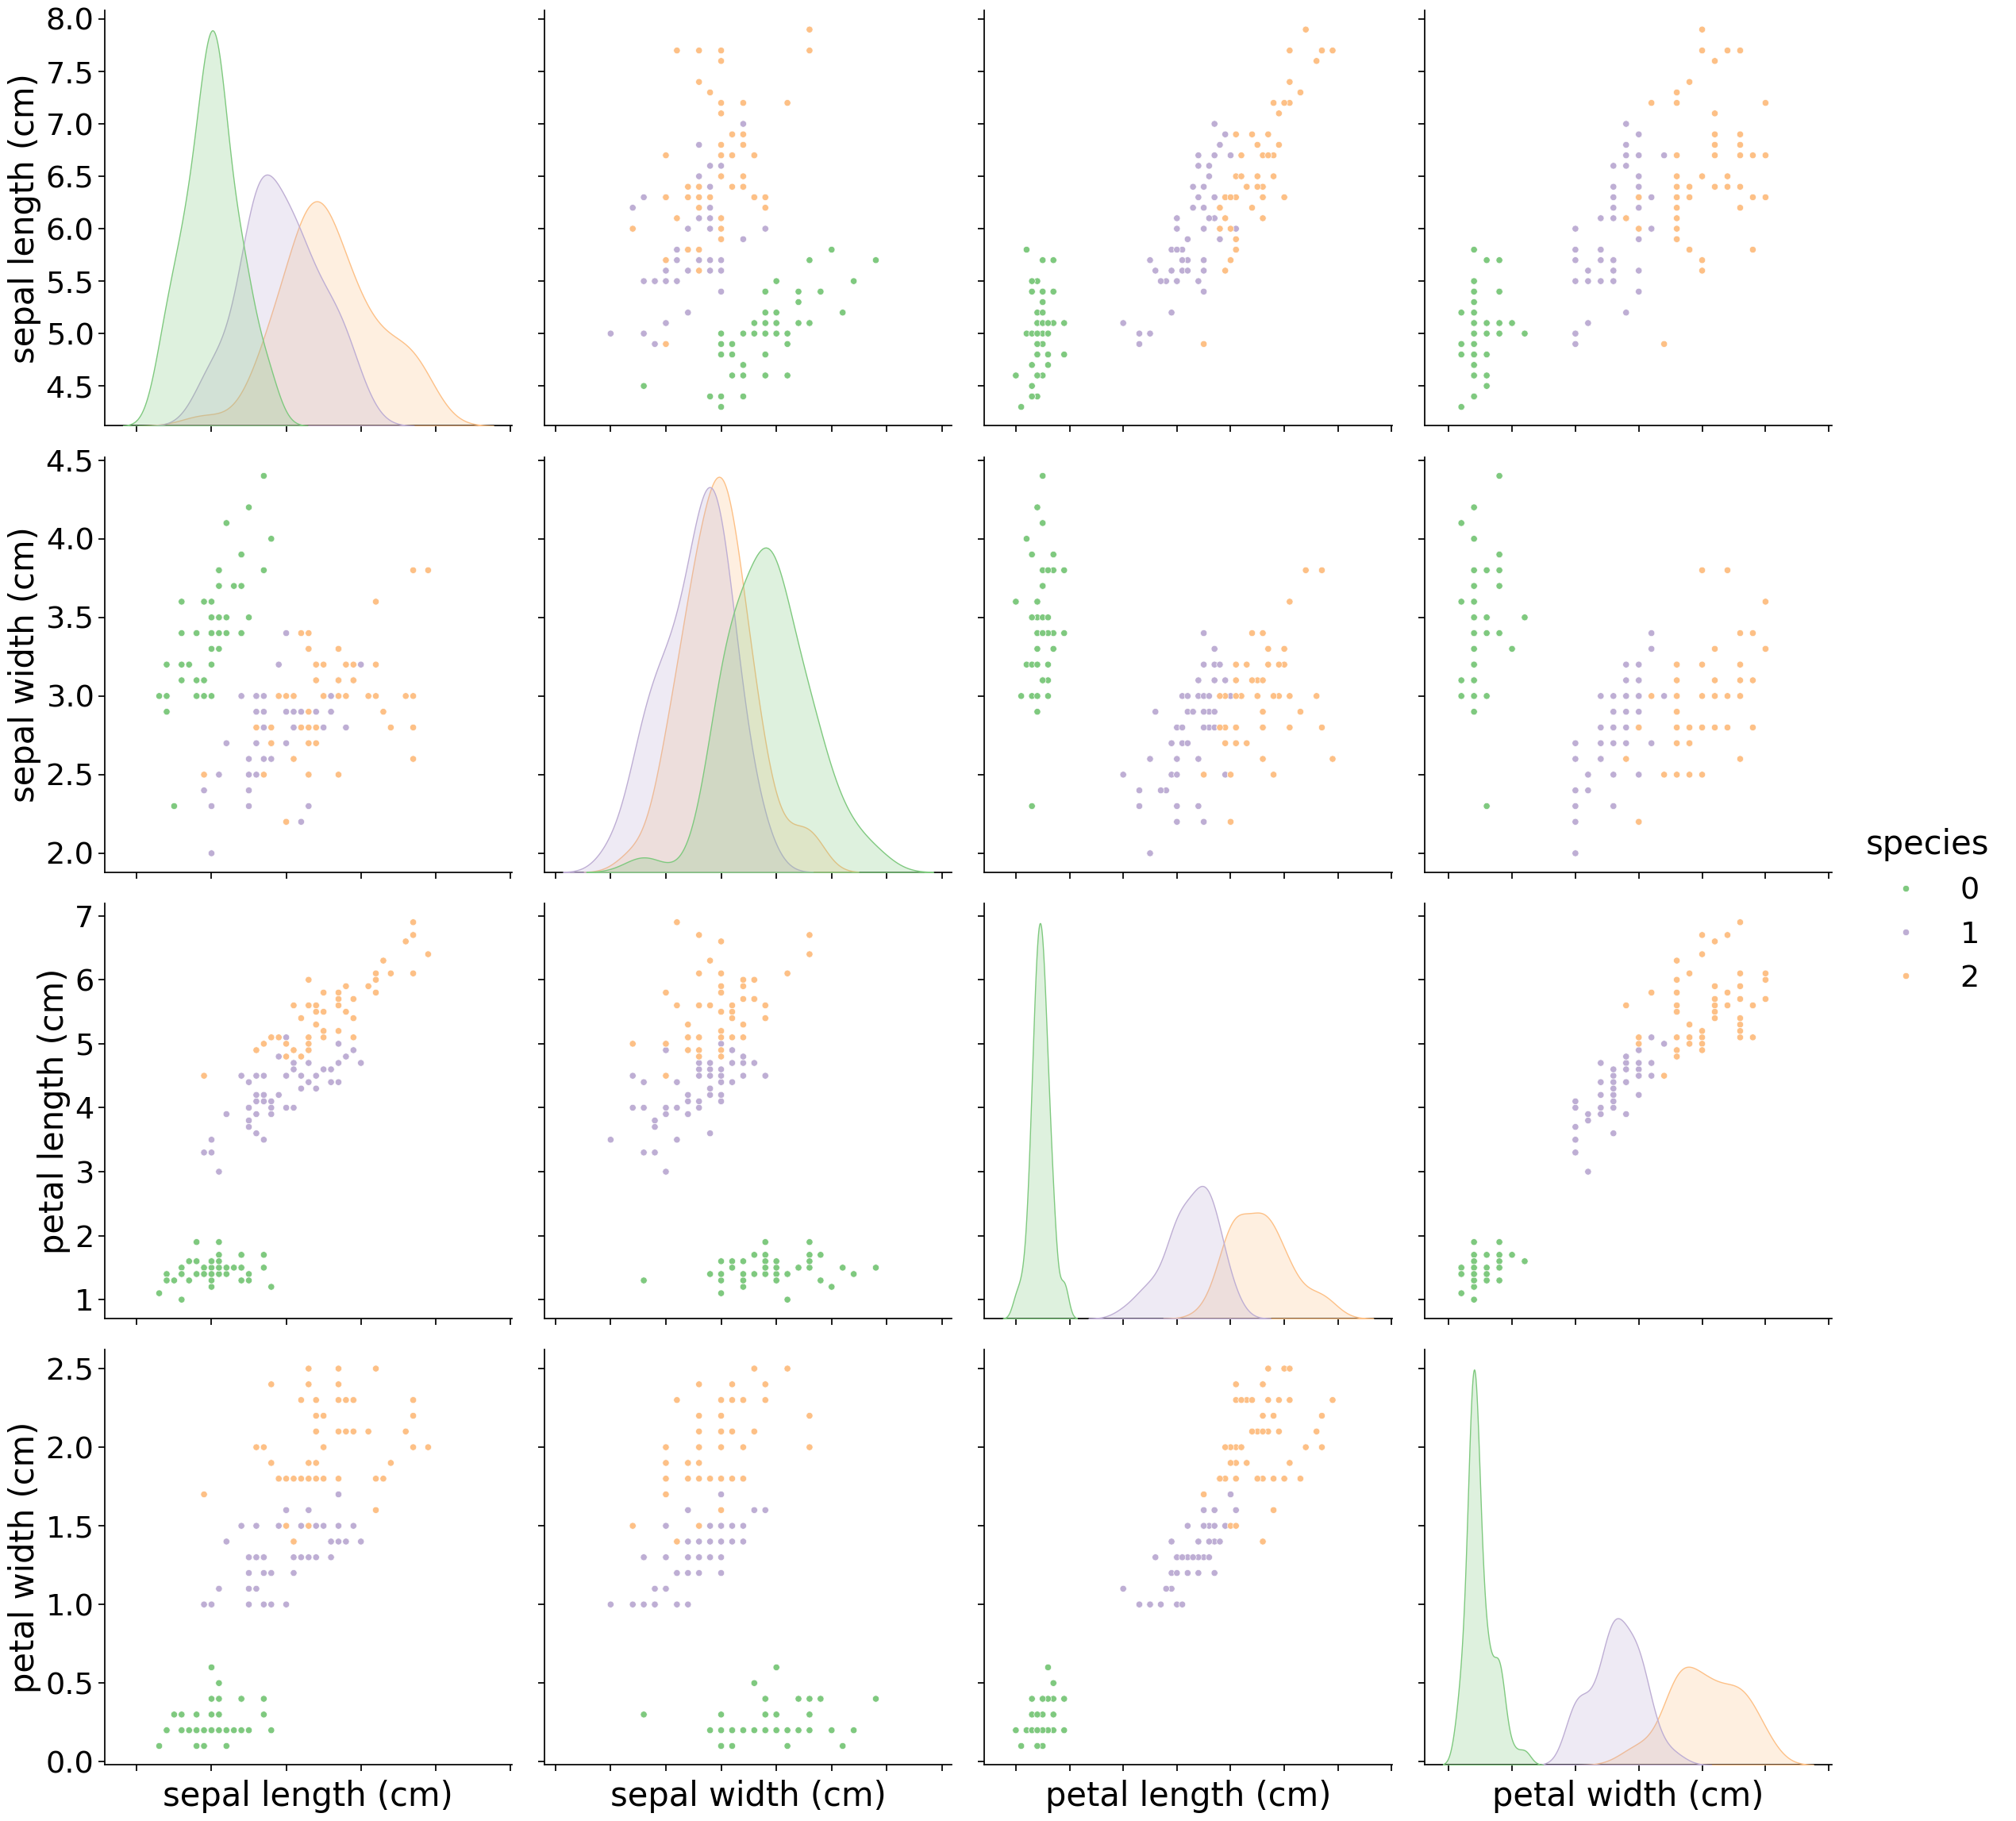

In [ ]:
# A pairplot is a great way to visualize the relationships between multiple variables in a dataset.
# It creates a grid of scatter plots for each pair of features,
# along with histograms or density plots on the diagonal.

with sns.plotting_context("notebook",font_scale=2.5):
    g = sns.pairplot(df_iris, hue='species', palette='Accent',height=6)
g.set(xticklabels=[]);

In [51]:
# A coorrelation matrix is a table that shows the correlation coefficients between variables.
# Each cell in the table displays the correlation between two variables.
df_iris.corr()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),species
sepal length (cm),1.000000,-0.117570,0.871754,0.817941,0.782561
sepal width (cm),-0.117570,1.000000,-0.428440,-0.366126,-0.426658
petal length (cm),0.871754,-0.428440,1.000000,0.962865,0.949035
petal width (cm),0.817941,-0.366126,0.962865,1.000000,0.956547
species,0.782561,-0.426658,0.949035,0.956547,1.000000


<Axes: >

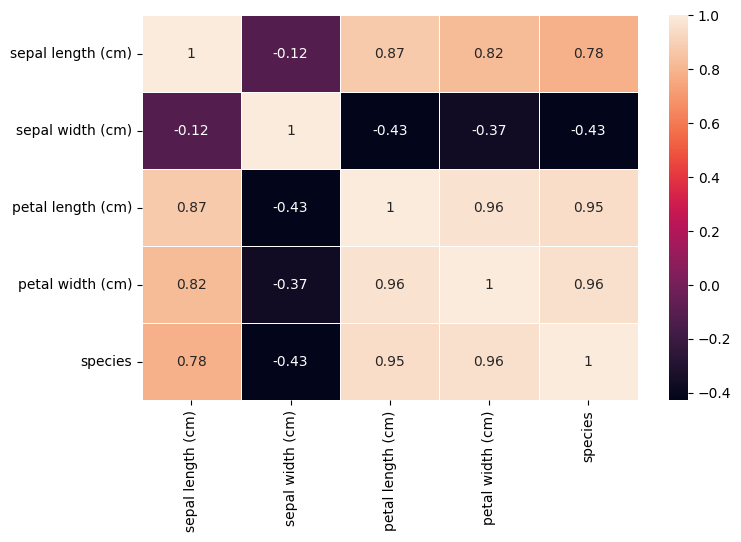

In [16]:
# The correlation matrix can be visualized using a heatmap.
# A heatmap is a graphical representation of data where individual values are represented as colors.

fig, ax = plt.subplots(figsize=(8,5))
sns.heatmap(df_iris.corr(), annot=True, linewidths=.5, ax=ax)

### STEP 6 Identify outliers

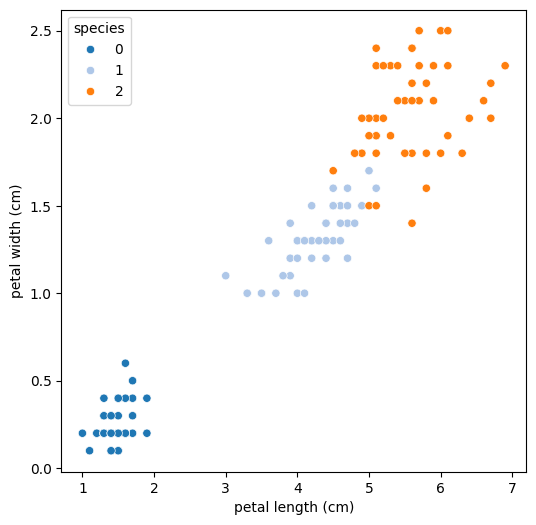

In [52]:
# The scatter plot is a basic plot that shows the relationship between two variables.
# It is useful for visualizing the distribution of data points in two-dimensional space.

rcParams['figure.figsize'] = (6.0, 6.0)
sns.scatterplot(x='petal length (cm)', y='petal width (cm)', data=df_iris, hue='species', palette='tab20')
plt.show()

<Axes: xlabel='species', ylabel='petal length (cm)'>

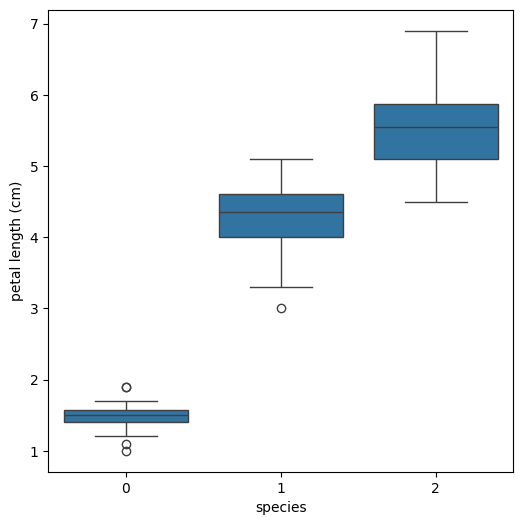

In [53]:
# The box plot is a standardized way of displaying the distribution of data based on a five-number summary.
# The five-number summary consists of the minimum, first quartile (Q1), median (Q2), third quartile (Q3), and maximum.
sns.boxplot(x='species', y='petal length (cm)', data=df_iris)

In [54]:
df_filtered = df_iris[df_iris['species'] == 2]

In [55]:
df_filtered.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),species
100,6.3,3.3,6.0,2.5,2
101,5.8,2.7,5.1,1.9,2
102,7.1,3.0,5.9,2.1,2
103,6.3,2.9,5.6,1.8,2
104,6.5,3.0,5.8,2.2,2


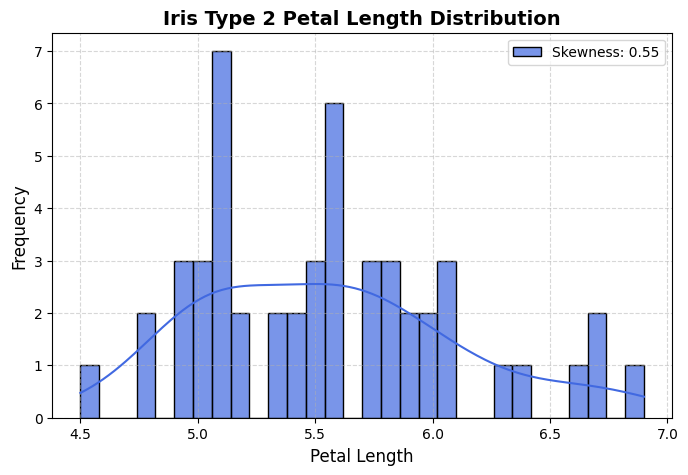

In [56]:
plt.figure(figsize=(8, 5))
sns.histplot(df_filtered["petal length (cm)"], bins=30, kde=True, color='royalblue', edgecolor='black', 
             alpha=0.7, label="Skewness: %.2f"%(df_filtered["petal length (cm)"].skew()))
plt.title("Iris Type 2 Petal Length Distribution", fontsize=14, fontweight='bold')
plt.legend()
plt.xlabel("Petal Length", fontsize=12)
plt.ylabel("Frequency", fontsize=12)
plt.grid(True, linestyle="--", alpha=0.5)
plt.show()


# **Skewness**
Definition: Skewness measures the asymmetry of the distribution.
Interpretation:
Skewness = 0: The distribution is perfectly symmetrical.
Positive skewness: The distribution has a long tail on the right side (more data points are clustered on the left).
Negative skewness: The distribution has a long tail on the left side (more data points are clustered on the right).
"Good" Skewness:
In many cases, a skewness close to 0 is desired because it indicates a symmetrical distribution, which is often assumed in statistical analyses.
However, "good" skewness depends on the context. In some cases, a certain level of skewness might be expected or even desirable (e.g., income distributions typically have positive skewness).

Moderate skew: Skewness between -0.5 and -1 (negative) or 0.5 and 1 (positive).
High skew: Skewness less than -1 (negative) or greater than 1 (positive).

# **Kurtosis**
Definition: Kurtosis measures the "tailedness" of the distribution, or the presence of outliers.
Interpretation:
Kurtosis = 3: This is the kurtosis of a normal distribution, known as mesokurtic.
Kurtosis > 3: The distribution has heavy tails and a sharp peak (leptokurtic), indicating more outliers.
Kurtosis < 3: The distribution has lighter tails and a flatter peak (platykurtic), indicating fewer outliers.
"Good" Kurtosis:
A kurtosis close to 3 is often considered "good" because it indicates a normal-like distribution, which is a common assumption in statistical models.
However, if you're analyzing data where outliers are important, a higher kurtosis might be more appropriate.


### STEP 7 Normalize data

In [57]:
# We can normalize the data using a log transformation.
# This is useful when the data is positively skewed.
# The log transformation can help to stabilize the variance and make the data more normally distributed.
# The log transformation is defined as log(x + 1), where x is the original value.
df_filtered["norm_values"] = np.log1p(df_filtered["petal length (cm)"])

C:\Users\cleme\AppData\Local\Temp\ipykernel_14332\506236119.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtered["norm_values"] = np.log1p(df_filtered["petal length (cm)"])


In [58]:
df_filtered.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),species,norm_values
100,6.3,3.3,6.0,2.5,2,1.945910
101,5.8,2.7,5.1,1.9,2,1.808289
102,7.1,3.0,5.9,2.1,2,1.931521
103,6.3,2.9,5.6,1.8,2,1.887070
104,6.5,3.0,5.8,2.2,2,1.916923


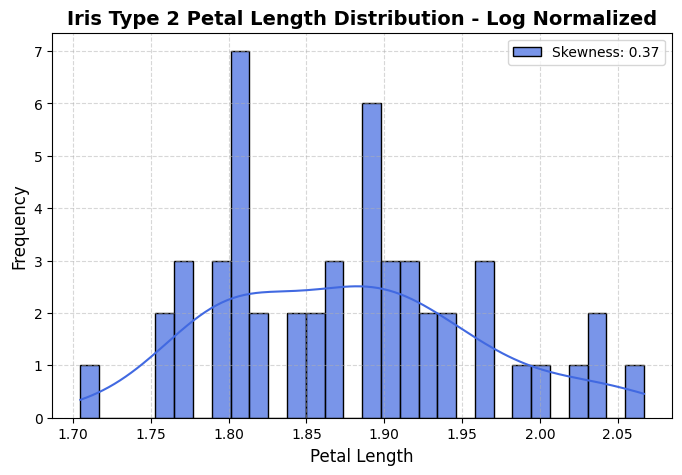

In [63]:
# We now plot the normalized values.
# The histogram shows the distribution of the normalized values.

plt.figure(figsize=(8, 5))
sns.histplot(df_filtered["norm_values"], bins=30, kde=True, color='royalblue', edgecolor='black', 
             alpha=0.7, label="Skewness: %.2f"%(df_filtered["norm_values"].skew()))
plt.title("Iris Type 2 Petal Length Distribution - Log Normalized", fontsize=14, fontweight='bold')
plt.legend()
plt.xlabel("Petal Length", fontsize=12)
plt.ylabel("Frequency", fontsize=12)
plt.grid(True, linestyle="--", alpha=0.5)
plt.show()

There is more to EDA!  We will continue to build this essential process out.